## Logistic Regression

In [1]:
#Target values will always be discrete - yes/no, 1/0,true/false, male/female, sml,medium,large,xl,xxl,0-9

In [2]:
from scipy.io import arff # to import .arff file to a dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
%matplotlib inline
os.getcwd()

'/Users/Edureka'

In [3]:
doctor=pd.read_csv('Doctor_Appointment_Noshow.csv')

In [4]:
doctor['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
doctor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
doctor=doctor.drop(['PatientId','AppointmentID'],axis=1)

In [7]:
doctor.sample(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
1541,F,2016-04-29T12:48:34Z,2016-04-29T00:00:00Z,47,TABUAZEIRO,0,0,0,0,0,0,Yes
73416,F,2016-05-05T08:45:20Z,2016-05-05T00:00:00Z,64,BONFIM,0,1,1,0,0,0,No
29008,F,2016-05-09T09:45:31Z,2016-05-12T00:00:00Z,19,FORTE SÃO JOÃO,0,0,0,0,0,1,No
66599,M,2016-03-01T11:43:46Z,2016-05-09T00:00:00Z,60,JARDIM CAMBURI,0,0,0,0,0,0,No
102246,F,2016-06-01T10:36:24Z,2016-06-01T00:00:00Z,5,ROMÃO,0,0,0,0,0,0,No


In [8]:
doctor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [9]:
doctor.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
categorical=[c for c in doctor.columns if doctor.dtypes[c]=='object']
continous=[c for c in doctor.columns if doctor.dtypes[c]!='object']

In [11]:
doctor[categorical]=doctor[categorical].apply(lambda x: LabelEncoder().fit_transform(x))

In [12]:
doctor['No-show'].unique()

array([0, 1])

In [13]:
target=doctor['No-show']
features=doctor.drop('No-show',axis=1)

In [14]:
scaler=StandardScaler()
features=scaler.fit_transform(features)

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=9999)

In [16]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((77368, 11), (77368,), (33159, 11), (33159,))

In [17]:
gm=LogisticRegression()

In [18]:
lgregressor=gm.fit(xtrain,ytrain)

In [19]:
lg_predict=gm.predict(xtest)

In [20]:
lg_predict

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
predict_prob_values=lgregressor.predict_proba(xtest)[:,1]

In [22]:
cm=confusion_matrix(ytest,lg_predict)

In [23]:
cm

array([[26232,   267],
       [ 6532,   128]])

In [24]:
acc=accuracy_score(ytest,lg_predict)
acc

0.7949576283965137

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc=roc_auc_score(ytest,lg_predict)

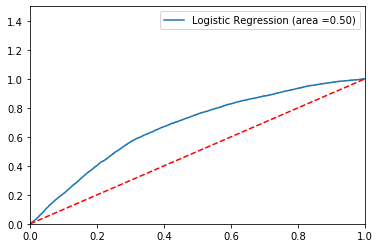

In [26]:
fpr,tpr,thresholds=roc_curve(ytest,predict_prob_values)
plt.plot(fpr,tpr,label='Logistic Regression (area =%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])
plt.legend()
plt.show()

In [27]:
# Decision Tree
# Random Forest
#KNN
# Naive Bayes
# SVM

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt=DecisionTreeClassifier(max_depth=5)
dt_model=dt.fit(xtrain,ytrain)

In [30]:
dt_predict=dt_model.predict(xtest)

In [31]:
dt_predict

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
dt_cm=confusion_matrix(ytest,dt_predict)

In [33]:
dt_cm

array([[26432,    67],
       [ 6611,    49]])

In [34]:
dt_acc=accuracy_score(ytest,dt_predict)

In [35]:
dt_acc

0.798606713109563

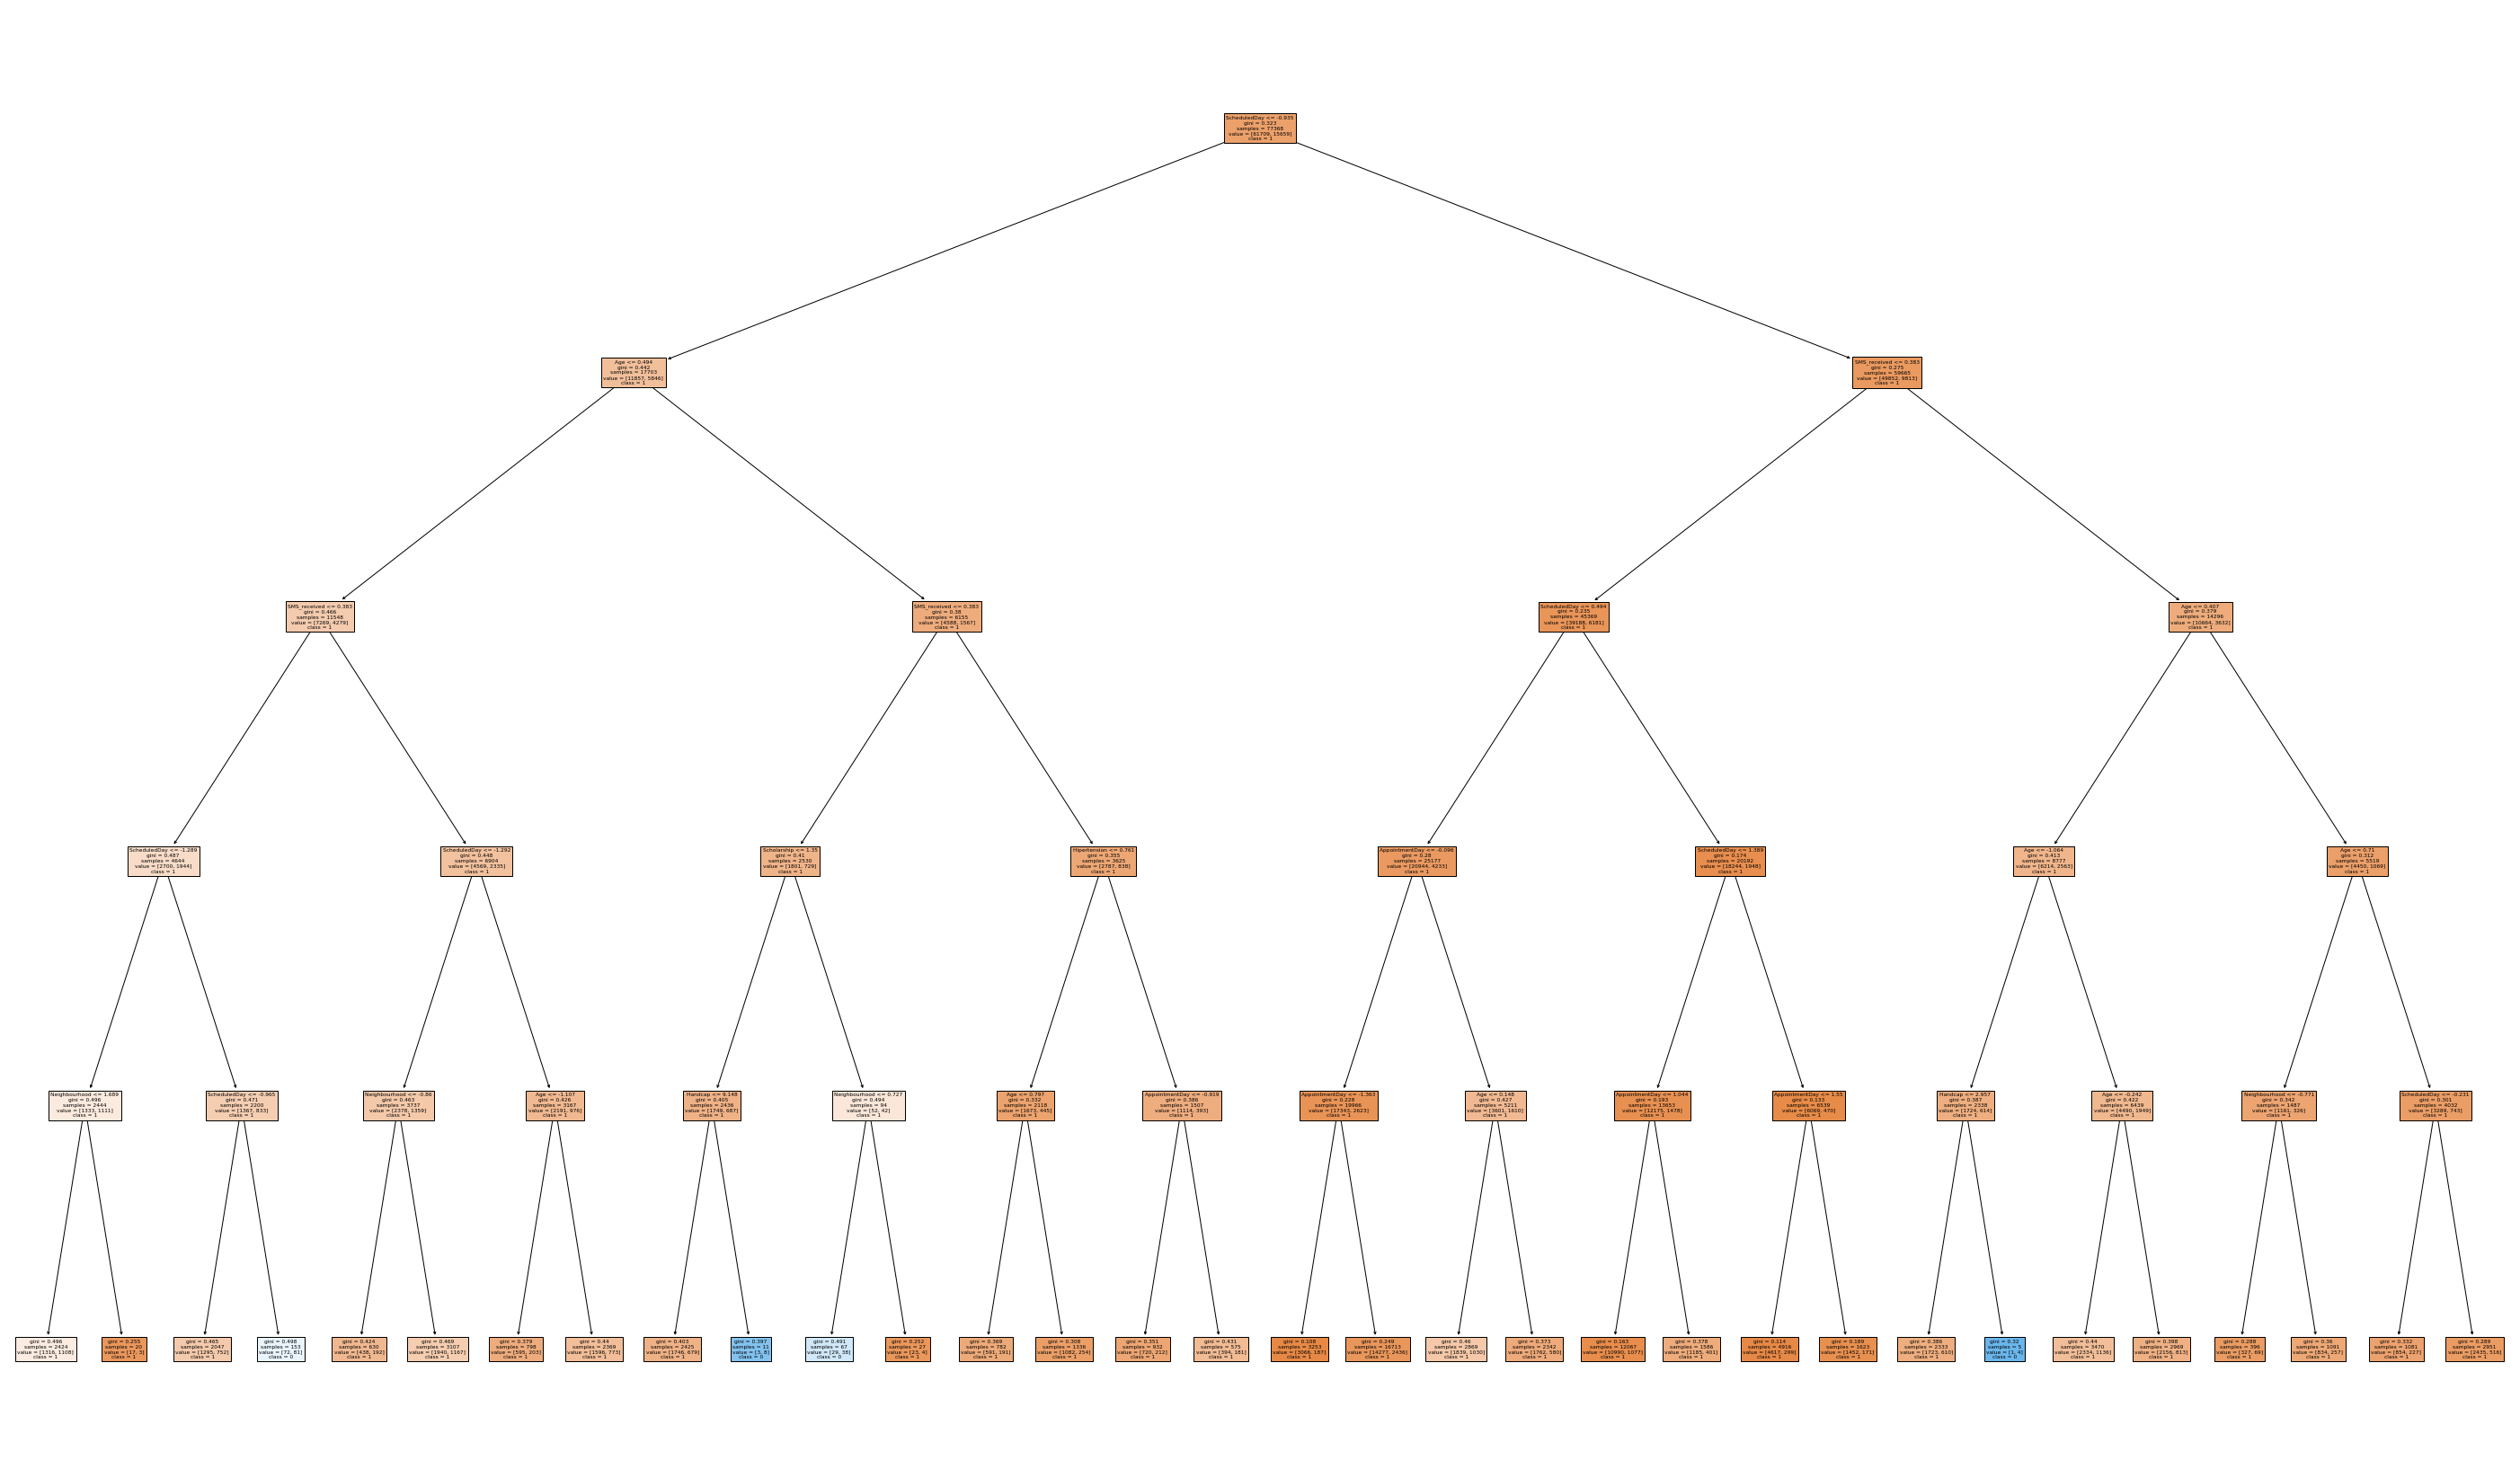

<Figure size 432x288 with 0 Axes>

In [36]:
#plot tree can also be used for visualising the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(50,30))
plot_tree(dt_model,class_names=list(['1','0']),feature_names=list(doctor.columns),filled=True)
plt.show()
plt.savefig('decisiontree.png')

### RandomForest

In [49]:
dv=doctor['No-show']
idv=doctor.drop(['No-show','Neighbourhood'],axis=1)

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(idv,dv,test_size=0.30,random_state=2503)

In [ ]:
feature_importance=pd.DataFrame({'Features':idv.columns,'Importance': np.round(dt_model.feature_importances_,3)})

In [ ]:
feature_importance=feature_importance.sort_values('Importance',ascending=False)
print(feature_importance)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=5)
rf_model=rf.fit(xtrain,ytrain)

In [54]:
rfresult=rf_model.predict(xtest)

In [55]:
rf_cm=confusion_matrix(ytest,rfresult)
print(rf_cm)

[[26496     0]
 [ 6663     0]]


In [56]:
rf_acc=accuracy_score(ytest,rfresult)
print(rf_acc)

0.7990590789830815


### KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn6=KNeighborsClassifier(n_neighbors=6)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3_model=knn3.fit(xtrain,ytrain)
knn6_model=knn6.fit(xtrain,ytrain)

In [60]:
knnresult6=knn6.predict(xtest)
knnresult3=knn3.predict(xtest)

In [61]:
knn6_acc=accuracy_score(ytest,knnresult6)
knn3_acc=accuracy_score(ytest,knnresult3)
print(knn6_acc)
print(knn3_acc)

0.7921831177056002
0.7603968756597003


### Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [63]:
gaussian_nb=GaussianNB()
gaussian_model=gaussian_nb.fit(xtrain,ytrain)

In [64]:
bernoulli_nb=BernoulliNB()
bernoulli_model=bernoulli_nb.fit(xtrain,ytrain)

In [65]:
gnbresult=gaussian_model.predict(xtest)
bnbresult=bernoulli_model.predict(xtest)

In [66]:
gnb_acc=accuracy_score(ytest,gnbresult)
bnb_acc=accuracy_score(ytest,bnbresult)
print(gnb_acc)
print(bnb_acc)

0.7990590789830815
0.7990590789830815


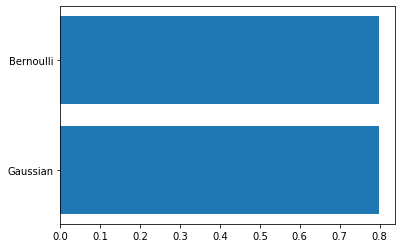

In [67]:
plt.barh(['Gaussian','Bernoulli'],[gnb_acc,bnb_acc])
plt.show()

In [68]:
from sklearn.svm import SVC

### Linear SVM

In [42]:
svclinear=SVC(kernel='linear',C=10)
svc_model=svclinear.fit(xtrain,ytrain)

In [43]:
svcrbf=SVC(kernel='rbf',gamma=3)
svcrbf_model=svcrbf.fit(xtrain,ytrain)

In [44]:
svc_linear_result=svc_model.predict(xtest)

In [45]:
svc_rbf_result=svcrbf_model.predict(xtest)

In [46]:
svc_linear_acc=accuracy_score(ytest,svc_linear_result)
svc_rbf_acc=accuracy_score(ytest,svc_rbf_result)
print(svc_linear_acc)
print(svc_rbf_acc)

0.780391447269218
0.8021653246479086


In [69]:
result_df=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','RandomForest','KNN 6','KNN 3','Gaussian NB','Bernoulli NB','SVM Linear','SVM RBF'],
                       'Accuracy':[acc,dt_acc,rf_acc,knn6_acc,knn3_acc,gnb_acc,bnb_acc,svc_linear_acc,svc_rbf_acc]})

In [74]:
result_df.sort_values(by ='Accuracy',ascending=False)

,Model,Accuracy
8,SVM RBF,0.802165
2,RandomForest,0.799059
5,Gaussian NB,0.799059
6,Bernoulli NB,0.799059
1,Decision Tree,0.798607
0,Logistic Regression,0.794958
3,KNN 6,0.792183
7,SVM Linear,0.780391
4,KNN 3,0.760397
